#**ÖRNEK**

Makine öğrenmesi modeli performans değerlendirme ölçülerinin hesaplanması için hazır veri seti ve farklı bir sınıflandırıcı ile yapılan örnek verilmiştir. Bunun için *sklearn* kütüphanesinde bulunan üç çıkış sınıfına sahip olan wine veri setinin *Gaussian Naive Bayes* sınıflandırıcısına uygulandığı makine öğrenmesi çıktısı incelenmştir. Uygulama Python programında yapılmıştır. Programda öncelikle *Scikit-learn* veri setleri kütüphanesinden *wine* veri seti yükleniyor. Daha sonra veri setinin %70'i eğitim ve %30'u test verisi olarak ayrılıyor. Elde edilen eğitim veri seti ile model eğitiliyor. Ardından test verisi girilerek tahmin yaptırılıyor.

Kodlarda görülebileceği üzere önce *Doğruluk*, *Kesinlik*, *Duyarlılık-Hatırlatma*, *F1 Skoru* ayrı ayrı hesaplanıyor. Bu değerleri her çıkış sınıfı için hesaplatarak modelin performans özetini çıkarmak için *scikit-learn* kütüphanesindeki *classification.report* işlevi kullanılıyor. Böylece *Doğruluk*, *Kesinlik*, *Duyarlılık-Hatırlatma*, *F1 Skoru* ölçülerinin değerlerini makine öğrenmesinde 3 ayrı çıkış sınıfı bulunduğu için her bir çıkış için değerler ayrı ayrı verilmektedir. Buradan test veri setindeki 54 verinin sınıflara göre dağılımlarını ve tüm model çıkışını kapsayan ortalama değerleri bulmak mümkündür.




Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

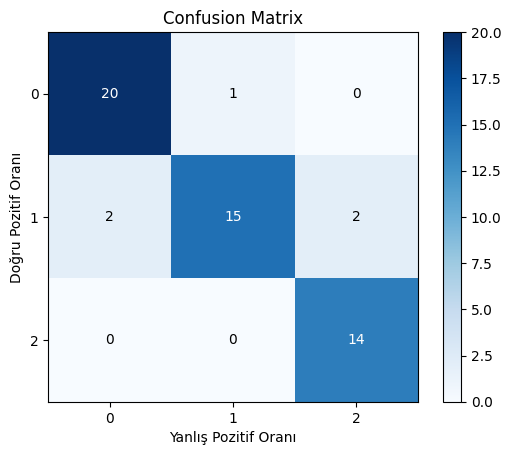

In [7]:
#scikit-learn veri setleri kütüphanesi içe aktarılır.
from sklearn import datasets

#wine veri setini yükle
wine=datasets.load_wine()

#Veri setindeki 13 özelliğin isimlerini yazdır.
print("Features:",wine.feature_names)

#wine etiket türlerini yazdır.
print("Labels:",wine.target_names)

#veri özellik şeklini yazdır
wine.data.shape

#En üstteki 5 veri için özellikleri yazdır.
print(wine.data[0:])

#wine etiketlerini yazdır(0:sınıf_0, 1:sınıf_2, 2:sınıf_2)
print(wine.target)

#eğitim ve test verilerini otomatik bölmek için train_test_split
#fonksiyonu içe aktar
from sklearn.model_selection import train_test_split

#eğitim ve test verisi olarak ayır
#%70 eğitim ve %30 test verisi olarak ayarlanır
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3,random_state=109)

#Gaussian Naive Bayes Modelini içe aktar
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#Bir Gaussian sınıflandırıcı oluştur.
gnb= GaussianNB()


#Eğitim veri setleri kullanarak modeli eğitme
gnb.fit(X_train,y_train)

#Test veri seti için çıktıları tahmin ettirme
y_pred=gnb.predict(X_test)
print("*"*25)

# Doğruluk hesaplaması için scikit-learn metrik modülünü içe aktarın.
from sklearn import metrics

#Model doğruluk değerini hesaplama
print("Doğruluk (Accuracy):",metrics.accuracy_score(y_test,y_pred))
print("*"*25)
from sklearn.metrics import precision_score
#Modelin kesinlik değerini hesaplama
Kesinlik=precision_score(y_test,y_pred,average='weighted')
print("Kesinlik(precision):", Kesinlik)
print("*"*25)
from sklearn.metrics import recall_score
Duyar=recall_score(y_test,y_pred,average='weighted')
print("Hatırlatma(Duyarlılık):", Duyar)
print("*"*25)
#Modelin F1 skoru değerini hesaplama
from sklearn.metrics import f1_score
#Model F1 puanı
f1puan=f1_score(y_test,y_pred,average='weighted')
print("F1 skoru:", f1puan)
print("*"*25)
#Sınıflandırıcı modelinin performans özetini alma
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)
print("*"*25)
#Karmaşıklık matrisi ile ilgili kütüphaneler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#Karışıklık matrisinin yazdırılması
karmat=confusion_matrix(y_test,y_pred,labels=[0,1,2])
print("Karmaşıklık Matrisi:",karmat)
!pip install scikit-plot
import scikitplot as skplt
#Karmaşıklık matrisinin çizdirilmesi
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
#eksen etiketleri
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.show()

*************************
Yeteneksiz:ROC AUC 0.500000
Lojistik sınıflandırıcı 0.902821
*************************


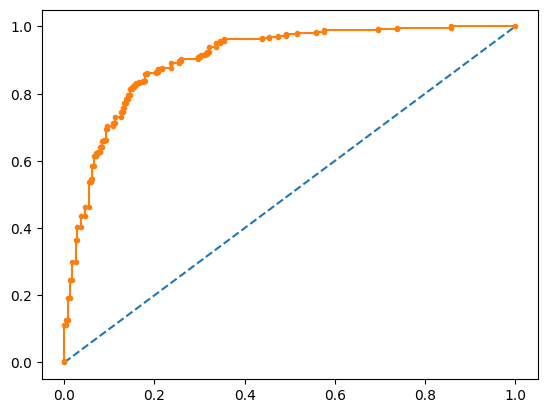

In [8]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#2 çıkıl sınıflı veri seti üretme
X,y =make_classification(n_samples=1000,n_classes=2, random_state=1)
#Eğitim ve veri setlerini ayırma
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.5,random_state=2)
#yeteneksiz tahmin oluşturma (çoğunluk sınıfı)
ns_probs=[0 for _ in range(len(testy))]
#Bir model oluşturma
model=LogisticRegression(solver='lbfgs')
model.fit(trainX,trainy)
# ihtimalleri tahmin etme
lr_probs=model.predict_proba(testX)
#Sadece pozitifçıktılar için ihtimalleri muhafaza etme
lr_probs=lr_probs[:,1]
#skorları hesaplama
ns_auc=roc_auc_score(testy, ns_probs)
lr_auc=roc_auc_score(testy,lr_probs)
#özet skorlar
print("*"*25)
print("Yeteneksiz:ROC AUC %3f" % (ns_auc))
print("Lojistik sınıflandırıcı %3f" % (lr_auc))
print("*"*25)
#roc eğrisi
ns_fpr,ns_tpr,_=roc_curve(testy,ns_probs)
lr_fpr,lr_tpr,_=roc_curve(testy,lr_probs)
import matplotlib.pyplot as pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#model için roc eğrisi çizme
pyplot.plot(ns_fpr,ns_tpr,linestyle='--',label='Yeteneksiz')
pyplot.plot(lr_fpr,lr_tpr,marker='.',label='Lojistik')
#eksen etiketleri
